In [29]:
import tensorflow as tf
import keras as keras
import numpy as np
from sklearn.datasets import load_breast_cancer

In [30]:
df = load_breast_cancer()
type(df)

#Note: This is a Bunch object (similar idea of dictionary format)
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
#0 is malignant, 1 is non-malignant

df.data.shape
df.target_names
print(df.target)
print(df.target.shape)
print(df.feature_names.shape)
df.feature_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
#Let us split the data into training and test/validation sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=1/3)
N, D = X_train.shape
print(N,D)

#N is sample size and D is the dimensions or number of features/variables

379 30


In [33]:
#Standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
#Build the model using tensorflow

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),                  #Input layer with 30 features
    tf.keras.layers.Dense(1, activation='sigmoid')      #output layer with 1 node for classification
])

In [35]:
#Alternatively, we can do this
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [36]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])    #Adam is Adaptive Moment Estimation Extension of Stochastic Gradient Descent

#Ready to train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3951 - loss: 0.9806 - val_accuracy: 0.4263 - val_loss: 0.9707
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4435 - loss: 0.8964 - val_accuracy: 0.4737 - val_loss: 0.8799
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4935 - loss: 0.8557 - val_accuracy: 0.5158 - val_loss: 0.8008
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5887 - loss: 0.7425 - val_accuracy: 0.5737 - val_loss: 0.7297
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5981 - loss: 0.7231 - val_accuracy: 0.6316 - val_loss: 0.6687
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6613 - loss: 0.6557 - val_accuracy: 0.6684 - val_loss: 0.6147
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6976 - loss: 0.6180 - val_accuracy: 0.7158 - val_loss: 0.5685
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7312 - loss: 0.5295 - val_accuracy: 0.7421 - 

In [37]:
print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.9829 - loss: 0.1083
Train Score: [0.11342109739780426, 0.9736147522926331]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9848 - loss: 0.0769 
Test Score: [0.0774231031537056, 0.9894737005233765]


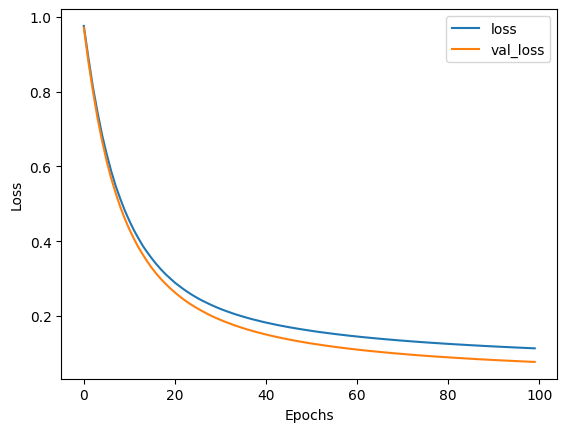

In [38]:
#Plot of Loss History
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

#Adding X and Y labels

plt.xlabel('Epochs')
plt.ylabel('Loss')

#Adding legend

plt.legend()

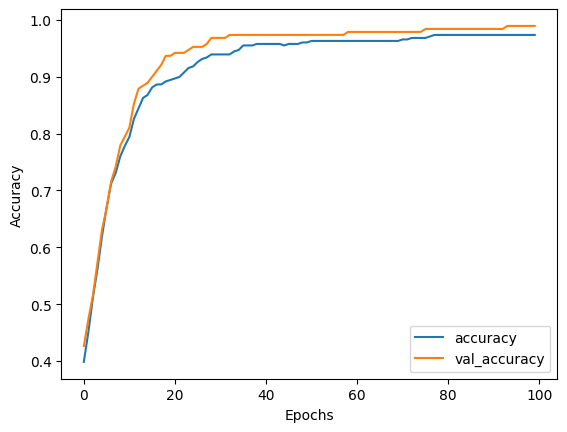

In [39]:
#Now plotting accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')

#Adding X and Y labels

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#Adding legend

plt.legend()

In [40]:
#Making predictions

import numpy as np
P = model.predict(X_test)
P = np.round(P).flatten()
print(P)
print(P.shape)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
(190,)


In [41]:
print("manually calculated accuracy (validation data = test data)", np.mean(P == y_test))
print("from actual model:", model.evaluate(X_test, y_test))

manually calculated accuracy (validation data = test data) 0.9894736842105263
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.0769 
from actual model: [0.0774231031537056, 0.9894737005233765]


In [42]:
#Saving and loading a model
model.save('logistic classifier.h5')

#Check

!dir

 Volume in drive C has no label.
 Volume Serial Number is 6A77-33FB

 Directory of c:\Users\coryg\OneDrive\Desktop

09/20/2024  10:30 AM    <DIR>          .
10/13/2023  06:51 PM    <DIR>          ..
02/06/2024  11:42 PM    <DIR>          datasets_Stat_510
09/12/2024  11:20 AM             2,253 Discord.lnk
09/20/2024  10:30 AM            17,960 logistic classifier.h5
04/20/2024  03:09 PM    <DIR>          Mathematics Textbooks
09/19/2024  12:59 PM    <DIR>          R_Files_and_Projects
09/20/2024  10:29 AM            96,267 STAT_479_NN_Lab2_True.ipynb
02/12/2024  03:32 PM               664 stat_510_hw1_code.txt
09/18/2024  10:49 PM    <DIR>          STAT_576_F24
01/08/2023  10:05 PM    <DIR>          UHP496MATH498ThesisStuff
05/29/2024  03:31 PM             1,410 Visual Studio Code.lnk
02/27/2024  01:28 PM             1,937 Zoom.lnk
               6 File(s)        120,491 bytes
               7 Dir(s)  853,186,371,584 bytes free


In [43]:
#let us load the model and confirm that it still works
model = tf.keras.models.load_model(r'C:\Users\coryg\OneDrive\Desktop\logistic classifier.h5')

In [44]:
print(model.layers)
model.evaluate(X_test, y_test)

[<Dense name=dense_1, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9848 - loss: 0.0769  


[0.0774231031537056, 0.9894737005233765]

In [50]:
#Linear Regression

import pandas as pd
import urllib.request

url = 'http://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'
urllib.request.urlretrieve(url, 'moore.csv')
print('Download successful')

data_new = pd.read_csv('moore.csv', header=None).values
print(data_new.shape)

Download successful
(162, 2)


In [53]:
#Reshape the data with 2D array of size N by 1

X = data_new[:,0].reshape(-1,1)
print(X.shape)
y_new = data_new[:,1]
print(y_new.shape)

(162, 1)
(162,)


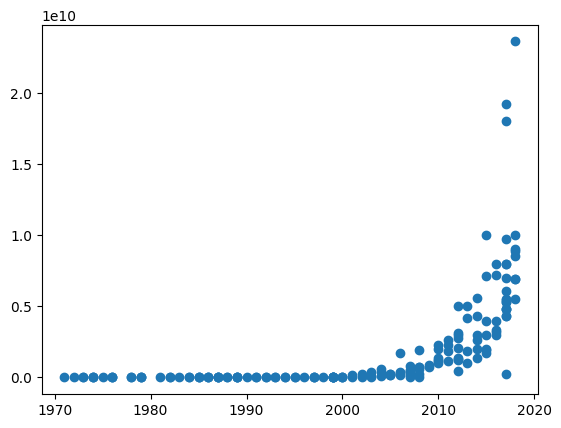

In [54]:
plt.scatter(X, y_new)

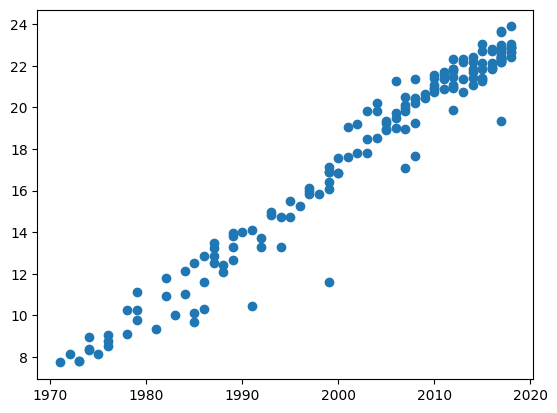

In [55]:
#Needs log transformation on y for linear regression

Y = np.log(y_new)
plt.scatter(X, Y)

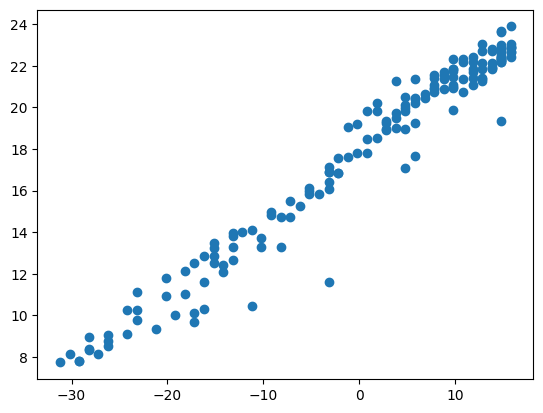

In [56]:
# Let us apply centering to X

X_centered = X - X.mean()
plt.scatter(X_centered, Y)

In [58]:
# Build our model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

#Here we specify the learning rate and momentum.
model.compile(optimizer=tf.keras.optimizers.SGD(.001, .9), loss='mse')

#Let us change the learning rate

def schedule(epoch, lr):
    if epoch >= 50:
        return .0001
    return .001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X_centered, Y, epochs = 200, callbacks=[scheduler])



Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 431.4026 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 297.6903 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255.0230 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252.4564 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171.5042 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118.5285 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.2472 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.1030 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.5933 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.9715 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.2168 - learning_rate: 0.0010
Epoch 12/200


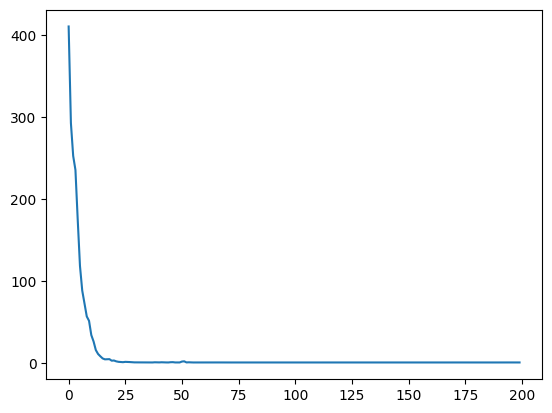

In [59]:
#Plot the loss

plt.plot(r.history['loss'], label = 'loss')

In [60]:
#Get the slope of the regression line

print(model.layers)
print(model.layers[0].get_weights())

#The weight would be .348 and b = 17.768

[<Dense name=dense_3, built=True>]
[array([[0.34889984]], dtype=float32), array([17.768963], dtype=float32)]


In [61]:
#Retrieve the slope

a = model.layers[0].get_weights()[0][0,0]
print(a)

0.34889984


$$ C = A_0 \cdot r^t

$$ \log(C) = t \cdot log(r) + log(A_0)

$$ \hat{y} = \log(C)$$
$$ a = \log(r)$$
$$x = t$$
$$b = \log(A_0)$$


$$ a = \log(r) = 0.348 $$
$$ r = e^{0.348} $$

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


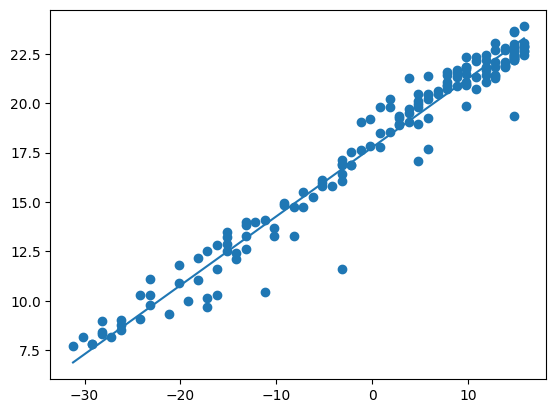

In [63]:
#Making Predictions for Linear Regression

Y_hat = model.predict(X_centered).flatten()
plt.scatter(X_centered, Y)
plt.plot(X_centered, Y_hat)

In [64]:
#Manual Calculation

w, b = model.layers[0].get_weights()
print(w, b)

[[0.34889984]] [17.768963]
